In [97]:
import pandas as pd
import numpy as np
import nltk
import spacy
from nltk import word_tokenize 
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
!head -n 20 alice30.txt


                ALICE'S ADVENTURES IN WONDERLAND

                          Lewis Carroll

               THE MILLENNIUM FULCRUM EDITION 3.0




                            CHAPTER I

                      Down the Rabbit-Hole


  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'


In [86]:
with open('alice30.txt', encoding='utf-8') as f:
    book = f.read().splitlines()

pdbook = pd.DataFrame(book)
pdbook.head(20)

,0
0,
1,ALICE'S ADVENTURES IN WONDERLAND
2,
3,Lewis Carroll
4,
5,THE MILLENNIUM FULCRUM EDITION 3.0
6,
7,
8,
9,


In [99]:
with open('alice30.txt', encoding='utf-8') as f:
    book = f.read().splitlines()

In [100]:
book = [i for i in book if i != '']

In [101]:
k = []

In [102]:
[k.extend(i.split()) for i in book]
None

In [103]:
len(k)

26467

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', ngram_range =(2,2))
X = vectorizer.fit_transform(book)
Vocabulary = vectorizer.vocabulary_
print("Vocabulary dtype:", type(Vocabulary))
print("Vocabulary:\n",Vocabulary)
# vdf=pd.DataFrame(Vocabulary)#columns=['bigramm', 'Value'])
# print(vdf[1])

# df0= pd.DataFrame.from_dict(vectorizer.vocabulary_)
Feature_Names= vectorizer.get_feature_names()
print(Feature_Names)
# print("Vectorized Corpus:\n",X.toarray())

Vocabulary dtype: <class 'dict'>
Vocabulary:
 {'alice adventures': 199, 'adventures in': 83, 'in wonderland': 5116, 'lewis carroll': 5884, 'the millennium': 10261, 'millennium fulcrum': 6453, 'fulcrum edition': 3602, 'down the': 2766, 'the rabbit': 10329, 'rabbit hole': 8243, 'alice was': 321, 'was beginning': 11841, 'beginning to': 1430, 'to get': 11069, 'get very': 3693, 'very tired': 11726, 'tired of': 11008, 'of sitting': 7226, 'sitting by': 9239, 'by her': 1752, 'her sister': 4548, 'on the': 7417, 'the bank': 10068, 'bank and': 1199, 'and of': 697, 'of having': 7154, 'having nothing': 4282, 'nothing to': 7028, 'to do': 11044, 'do once': 2573, 'once or': 7445, 'or twice': 7606, 'twice she': 11437, 'she had': 8986, 'peeped into': 7824, 'into the': 5185, 'the book': 10079, 'book her': 1564, 'sister was': 9228, 'was reading': 11926, 'reading but': 8374, 'but it': 1697, 'it had': 5325, 'had no': 4023, 'pictures or': 7879, 'or conversations': 7575, 'conversations in': 2170, 'in it': 504

In [95]:
# Vocabulary

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(#use_idf=False,
                             ngram_range=(2,2), 
                             #max_features=3,
                             norm=None
                            )
X = vectorizer.fit_transform(book)
print(vectorizer.get_feature_names())

print(X.toarray())

['_i_ don', '_i_ shan', 'able shall', 'about again', 'about and', 'about anxiously', 'about as', 'about at', 'about cats', 'about children', 'about easily', 'about fifteen', 'about foot', 'about for', 'about four', 'about half', 'about her', 'about here', 'about his', 'about in', 'about it', 'about lessons', 'about like', 'about me', 'about once', 'about ravens', 'about reminding', 'about said', 'about something', 'about stopping', 'about the', 'about them', 'about this', 'about thousand', 'about trouble', 'about two', 'about wasting', 'about whiting', 'about you', 'above her', 'above the', 'above week', 'absurd but', 'absurd for', 'acceptance of', 'accident all', 'accident of', 'accidentally upset', 'account of', 'accounting for', 'accounts for', 'accusation said', 'accustomed to', 'across her', 'across his', 'across the', 'across to', 'act of', 'actually took', 'ada she', 'added aloud', 'added as', 'added come', 'added in', 'added it', 'added looking', 'added the', 'added them', 'add

In [87]:
vectorizer_DOCs = TfidfVectorizer(use_idf=True,
                                  max_features = 100,
                                  ngram_range=(2,2) 
                                  )

X = vectorizer_DOCs.fit_transform(book)


print("Compact tfidf:\n",X)
X=X.toarray() 
print("Full tfidf :\n",X)
print(" Vocabulary / Feature Names:\n",vectorizer_DOCs.get_feature_names())

Compact tfidf:
   (12, 74)	1.0
  (15, 84)	0.7008374023125581
  (15, 1)	0.7133210606170168
  (16, 50)	0.5225127097926422
  (16, 83)	0.6239081090349836
  (16, 42)	0.5811360766511928
  (17, 29)	0.5897343442993255
  (17, 16)	0.5753006559345476
  (17, 27)	0.5667826377326002
  (18, 28)	1.0
  (19, 80)	1.0
  (21, 49)	0.4607942899079734
  (21, 9)	0.40560660635470075
  (21, 11)	0.48548851433213225
  (21, 53)	0.4154835538641944
  (21, 55)	0.46349349746203283
  (22, 22)	1.0
  (23, 97)	1.0
  (24, 91)	1.0
  (27, 77)	1.0
  (28, 40)	0.4739051852070092
  (28, 44)	0.5966449524947189
  (28, 74)	0.6476331338778808
  (29, 52)	0.7133210606170168
  (29, 94)	0.7008374023125581
  :	:
  (3576, 55)	1.0
  (3577, 50)	1.0
  (3578, 97)	1.0
  (3579, 90)	0.5240473493446868
  (3579, 5)	0.5077075385105269
  (3579, 26)	0.509091804191206
  (3579, 40)	0.45654459353904586
  (3581, 73)	0.5166186467957123
  (3581, 90)	0.5213095719704393
  (3581, 5)	0.5050551251104644
  (3581, 40)	0.45415947040067056
  (3582, 64)	0.46820253060

In [104]:
nlp = spacy.load("en_core_web_sm")

In [105]:
%%time
lemm_book = []
words_delete = ['say', 'come', 'look', 'the']
for part in book:
    doc = nlp(part)
    part_list = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num and not token.lemma_ in words_delete:
            part_list.append(token.lemma_)
    lemm_book.append(part_list)

CPU times: user 20.9 s, sys: 26.5 ms, total: 21 s
Wall time: 20.9 s


In [ ]:
# with open('lemm_lotr.txt', 'w', encoding='utf-8') as f:
#     for i in lemm_book:
#         f.write(' '.join(i) + '\n')

In [106]:
tokens = nltk.word_tokenize(' '.join([' '.join(i) for i in lemm_book]))

#Create your bigrams
bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
fdist = dict(sorted(fdist.items(), key=lambda item: -item[1]))
# for k,v in fdist.items():
#     if v < 10:
#         break
#     print (k,v)

LookupError: ignored

In [ ]:
# for k,v in fdist.items():
#     if v < 10:
#         break
#     print (k,v)

In [96]:
for i in fdist.keys():
    print(type(i))
    break

NameError: ignored

In [ ]:
len(lemm_book)

10925

In [ ]:
fdist[('Dark', 'Lord')]

50

In [ ]:
dict_lord = {}
for i in range(0, len(lemm_book), 1000):
    tokens = nltk.word_tokenize(' '.join([' '.join(i) for i in lemm_book[i : i + 500]]))
    bgs = nltk.bigrams(tokens)
    fdist = nltk.FreqDist(bgs)
    fdist = dict(sorted(fdist.items(), key=lambda item: -item[1]))
    
    dict_lord[i] = fdist.get(('Middle', 'earth'))

In [ ]:
y = pd.Series(dict_lord.values())
y.fillna(0, inplace=True)
y = list(y)
x = list(dict_lord.keys())

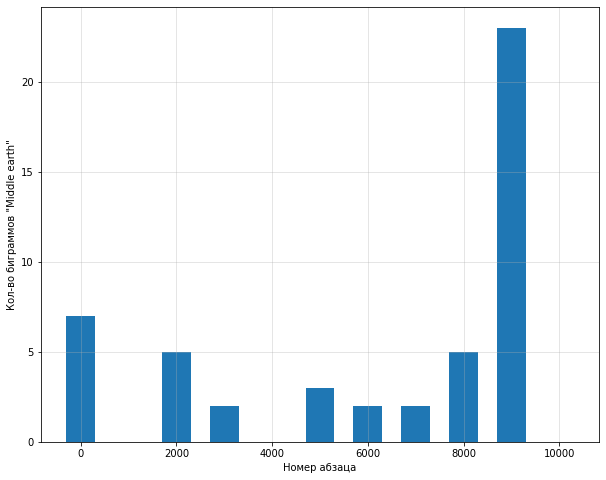

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(x, y, width=600)
plt.xlabel('Номер абзаца')
plt.ylabel('Кол-во биграммов "Middle earth"')
plt.grid(alpha=.4)
None